In [230]:
from scipy.signal import lsim
from scipy.signal import TransferFunction as tf
from scipy.signal import impulse
from scipy.signal import step
import matplotlib.pyplot as plt
import numpy as np

In [231]:
TIME = 10
R = 10
PW = 0.8

#basic values for system
a = [1, 0.5] #input coeffecients
b = [1] #output coeffecients
t = [i/R for i in range(TIME*R)] #generates time array
os = [] #ones array
ht = [] #impulse response
gt = [] #step response

#ones
def ones(t):
    return 1
#impulse function
def d(t):
    if t == 0 or t-PW < 0:
        return 1
    else:
        return 0
#unit step function
def u(t):
    if t < 0:
        return 0
    else: 
        return 1
#fills up array with function values
def input(f):
    x = []
    for i in t:
        x.append(f(i))
    return x

#impulse response 
def h(t):
    return np.exp(-t/2)*u(t)
#step response
def g(t):
    return (1-np.exp(-t/2))*2*u(t)
    

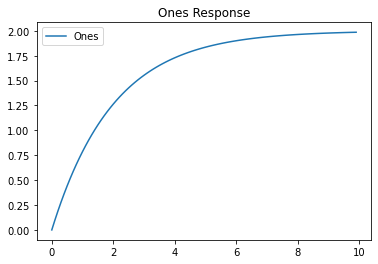

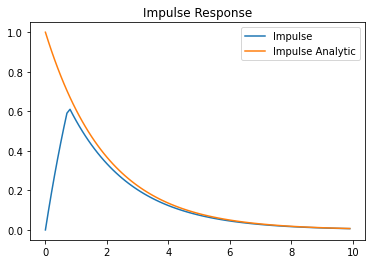

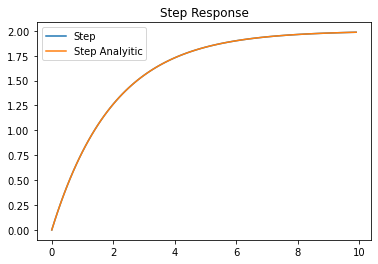

In [232]:
sys = tf(b, a)

os = input(ones)
hs = input(d)
gs = input(u)
ha = input(h)
ga = input(g)

#t, hs = impulse(sys, T=t)
#t, gs = step(sys, T=t)

#plot ones response
tout, yout, xout = lsim(sys, os, t)
plt.figure()
plt.title("Ones Response")
plt.plot(tout, yout, label="Ones")
plt.legend()

#plot impulse response
tout, yout, xout = lsim(sys, hs, t)
plt.figure()
plt.title("Impulse Response")
plt.plot(tout, yout, label="Impulse")
plt.plot(t, ha, label="Impulse Analytic")
plt.legend()

#plot step response
tout, yout, xout = lsim(sys, gs, t)
plt.figure()
plt.title("Step Response")
plt.plot(tout, yout, label="Step")
plt.plot(t, ga, label="Step Analyitic")
plt.legend()
